In [446]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [447]:
df=pd.read_csv("D:\\DATASETS\\spotify_full_list_20102023.csv")
df.head()

,Unnamed,Artist and Title,Artist,Streams,Daily,year,main_genre,genres,first_genre,second_genre,third_genre
0,0,J. Cole - No Role Modelz,J. Cole,2300753974,987553,2014,Hip-Hop/Rap,"['conscious hip hop', 'hip hop', 'north caroli...",conscious hip hop,hip hop,north carolina hip hop
1,1,Sam Smith - Stay With Me,Sam Smith,2135129240,875392,2014,Pop,"['pop', 'uk pop']",pop,uk pop,Unknown
2,2,Mark Ronson - Uptown Funk,Mark Ronson,2039781091,675268,2014,Pop,['pop soul'],pop soul,Unknown,Unknown
3,3,Sam Smith - I'm Not The Only One,Sam Smith,1926711475,791299,2014,Pop,"['pop', 'uk pop']",pop,uk pop,Unknown
4,4,Maroon 5 - Sugar,Maroon 5,1877824112,552959,2014,Pop,['pop'],pop,Unknown,Unknown


In [448]:
df.shape

(10439, 11)

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10439 entries, 0 to 10438
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed           10439 non-null  int64 
 1   Artist and Title  10439 non-null  object
 2   Artist            10439 non-null  object
 3   Streams           10439 non-null  int64 
 4   Daily             10439 non-null  int64 
 5   year              10439 non-null  int64 
 6   main_genre        10109 non-null  object
 7   genres            10109 non-null  object
 8   first_genre       10109 non-null  object
 9   second_genre      10109 non-null  object
 10  third_genre       10109 non-null  object
dtypes: int64(4), object(7)
memory usage: 897.2+ KB


In [450]:
df.describe()

,Unnamed,Streams,Daily,year
count,10439.000000,1.043900e+04,1.043900e+04,10439.000000
mean,5219.000000,3.388794e+08,1.557503e+05,2017.672191
std,3013.624064,3.540705e+08,2.177566e+05,3.536174
min,0.000000,1.000835e+08,0.000000e+00,2010.000000
25%,2609.500000,1.500276e+08,4.115850e+04,2015.000000
50%,5219.000000,2.107616e+08,8.247300e+04,2018.000000
75%,7828.500000,3.678101e+08,1.746950e+05,2021.000000
max,10438.000000,4.387732e+09,3.009384e+06,2023.000000


In [451]:
df.isnull().mean()*100

Unnamed             0.000000
Artist and Title    0.000000
Artist              0.000000
Streams             0.000000
Daily               0.000000
year                0.000000
main_genre          3.161222
genres              3.161222
first_genre         3.161222
second_genre        3.161222
third_genre         3.161222
dtype: float64

In [452]:
titles = []

for index, entry in enumerate(df['Artist and Title']):
    parts = entry.rsplit('-', 1) 
    if len(parts) == 2:  
        artist = parts[0].strip()
        title = parts[1].strip()  
        titles.append(title)
    else:
        print(f"Warning: Entry at index {index} does not have two parts: '{entry}'")

In [456]:
df['Title']=pd.DataFrame(titles)

In [459]:
cols=[i for i in df.columns if df[i].isnull().mean() < 0.05 and df[i].isnull().mean() > 0]
cols

['main_genre', 'genres', 'first_genre', 'second_genre', 'third_genre']

In [460]:
df.dropna(subset=cols,inplace=True)
df.isnull().mean()*100

Unnamed             0.0
Artist and Title    0.0
Artist              0.0
Streams             0.0
Daily               0.0
year                0.0
main_genre          0.0
genres              0.0
first_genre         0.0
second_genre        0.0
third_genre         0.0
Title               0.0
dtype: float64

In [461]:
df.head(3)

,Unnamed,Artist and Title,Artist,Streams,Daily,year,main_genre,genres,first_genre,second_genre,third_genre,Title
0,0,J. Cole - No Role Modelz,J. Cole,2300753974,987553,2014,Hip-Hop/Rap,"['conscious hip hop', 'hip hop', 'north caroli...",conscious hip hop,hip hop,north carolina hip hop,No Role Modelz
1,1,Sam Smith - Stay With Me,Sam Smith,2135129240,875392,2014,Pop,"['pop', 'uk pop']",pop,uk pop,Unknown,Stay With Me
2,2,Mark Ronson - Uptown Funk,Mark Ronson,2039781091,675268,2014,Pop,['pop soul'],pop soul,Unknown,Unknown,Uptown Funk


In [462]:
df.drop(['Unnamed', 'genres', 'third_genre'], axis=1, inplace=True)
df.head(3)

,Artist and Title,Artist,Streams,Daily,year,main_genre,first_genre,second_genre,Title
0,J. Cole - No Role Modelz,J. Cole,2300753974,987553,2014,Hip-Hop/Rap,conscious hip hop,hip hop,No Role Modelz
1,Sam Smith - Stay With Me,Sam Smith,2135129240,875392,2014,Pop,pop,uk pop,Stay With Me
2,Mark Ronson - Uptown Funk,Mark Ronson,2039781091,675268,2014,Pop,pop soul,Unknown,Uptown Funk


In [465]:
df.loc[548]

Artist and Title     Ed Sheeran - Perfect
Artist                         Ed Sheeran
Streams                        3040567433
Daily                             1129541
year                                 2017
main_genre                            Pop
first_genre                           pop
second_genre        singer-songwriter pop
Title                             Perfect
Name: 548, dtype: object

In [466]:
df.head()

,Artist and Title,Artist,Streams,Daily,year,main_genre,first_genre,second_genre,Title
0,J. Cole - No Role Modelz,J. Cole,2300753974,987553,2014,Hip-Hop/Rap,conscious hip hop,hip hop,No Role Modelz
1,Sam Smith - Stay With Me,Sam Smith,2135129240,875392,2014,Pop,pop,uk pop,Stay With Me
2,Mark Ronson - Uptown Funk,Mark Ronson,2039781091,675268,2014,Pop,pop soul,Unknown,Uptown Funk
3,Sam Smith - I'm Not The Only One,Sam Smith,1926711475,791299,2014,Pop,pop,uk pop,I'm Not The Only One
4,Maroon 5 - Sugar,Maroon 5,1877824112,552959,2014,Pop,pop,Unknown,Sugar


In [467]:
df[df['Title'].str.strip()=="There's Nothing Holdin' Me Back"]

,Artist and Title,Artist,Streams,Daily,year,main_genre,first_genre,second_genre,Title
557,Shawn Mendes - There's Nothing Holdin' Me Back,Shawn Mendes,2107533388,967931,2017,Pop,canadian pop,pop,There's Nothing Holdin' Me Back


In [468]:
df.columns

Index(['Artist and Title', 'Artist', 'Streams', 'Daily', 'year', 'main_genre',
       'first_genre', 'second_genre', 'Title'],
      dtype='object')

In [469]:
new_order=['Artist and Title','Title' ,'Artist', 'Streams', 'Daily', 'year', 'main_genre',
       'first_genre', 'second_genre']
df=df[new_order]
df.head()

,Artist and Title,Title,Artist,Streams,Daily,year,main_genre,first_genre,second_genre
0,J. Cole - No Role Modelz,No Role Modelz,J. Cole,2300753974,987553,2014,Hip-Hop/Rap,conscious hip hop,hip hop
1,Sam Smith - Stay With Me,Stay With Me,Sam Smith,2135129240,875392,2014,Pop,pop,uk pop
2,Mark Ronson - Uptown Funk,Uptown Funk,Mark Ronson,2039781091,675268,2014,Pop,pop soul,Unknown
3,Sam Smith - I'm Not The Only One,I'm Not The Only One,Sam Smith,1926711475,791299,2014,Pop,pop,uk pop
4,Maroon 5 - Sugar,Sugar,Maroon 5,1877824112,552959,2014,Pop,pop,Unknown


In [470]:
df[df['Title'].str.strip()=="There's Nothing Holdin' Me Back"]

,Artist and Title,Title,Artist,Streams,Daily,year,main_genre,first_genre,second_genre
557,Shawn Mendes - There's Nothing Holdin' Me Back,There's Nothing Holdin' Me Back,Shawn Mendes,2107533388,967931,2017,Pop,canadian pop,pop


In [471]:
df.drop('Artist and Title',axis=1,inplace=True)
df.head(3)

C:\Users\hp\AppData\Local\Temp\ipykernel_15956\2156481827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Artist and Title',axis=1,inplace=True)


,Title,Artist,Streams,Daily,year,main_genre,first_genre,second_genre
0,No Role Modelz,J. Cole,2300753974,987553,2014,Hip-Hop/Rap,conscious hip hop,hip hop
1,Stay With Me,Sam Smith,2135129240,875392,2014,Pop,pop,uk pop
2,Uptown Funk,Mark Ronson,2039781091,675268,2014,Pop,pop soul,Unknown


In [472]:
df[df['Title'].str.strip()=="There's Nothing Holdin' Me Back"]

,Title,Artist,Streams,Daily,year,main_genre,first_genre,second_genre
557,There's Nothing Holdin' Me Back,Shawn Mendes,2107533388,967931,2017,Pop,canadian pop,pop


In [473]:
Top10_mostStremed_songs=df[['Title','Streams']].sort_values(by='Streams',ascending=False).head(10)
Top10_mostStremed_songs

,Title,Streams
7442,Blinding Lights,4387731728
546,Shape of You,3973446189
8442,Someone You Loved,3522436549
4071,As It Was,3471556211
8443,Sunflower,3453846546
5765,Starboy,3401512331
5766,One Dance,3280298923
3072,STAY,3202673861
9439,Dance Monkey,3112873889
547,Believer,3083580989


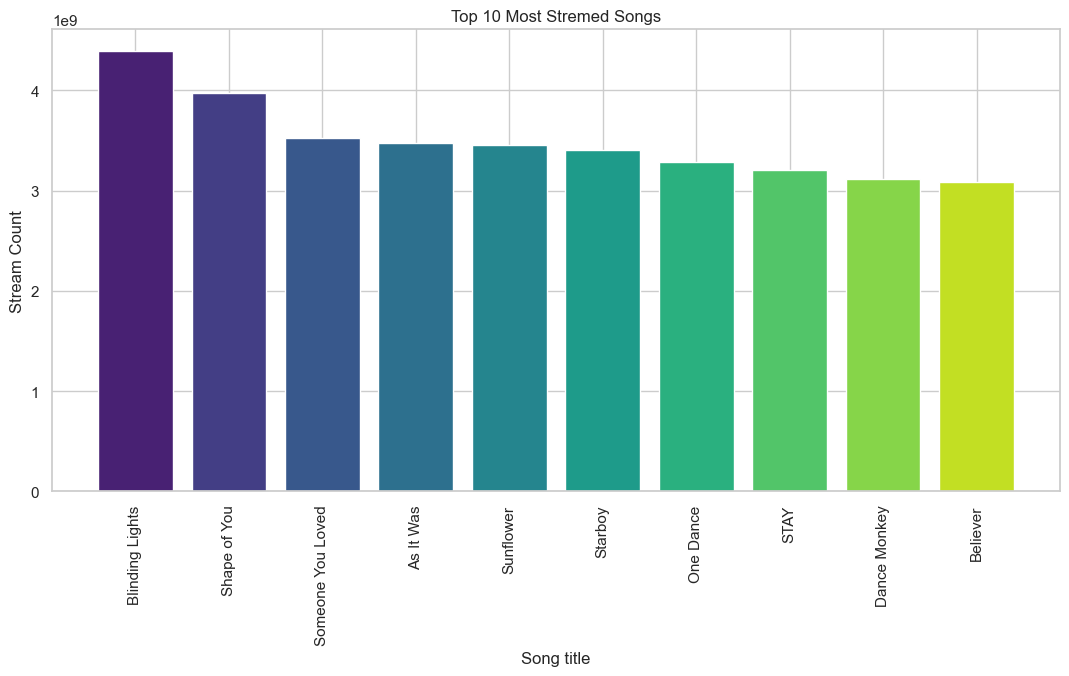

In [474]:
plt.figure(figsize=(13,6))
colors=sns.color_palette('viridis',len(Top10_mostStremed_songs))
plt.bar(Top10_mostStremed_songs['Title'],Top10_mostStremed_songs['Streams'],color=colors)
plt.title("Top 10 Most Stremed Songs")
plt.xlabel("Song title")
plt.ylabel("Stream Count")
plt.xticks(rotation=90)
plt.show()

In [475]:
Top10_mostStremed_Artist=df[['Artist','Streams']].sort_values(by='Streams',ascending=False).head(10)
Top10_mostStremed_Artist

,Artist,Streams
7442,The Weeknd,4387731728
546,Ed Sheeran,3973446189
8442,Lewis Capaldi,3522436549
4071,Harry Styles,3471556211
8443,Post Malone,3453846546
5765,The Weeknd,3401512331
5766,Drake,3280298923
3072,The Kid LAROI,3202673861
9439,Tones And I,3112873889
547,Imagine Dragons,3083580989


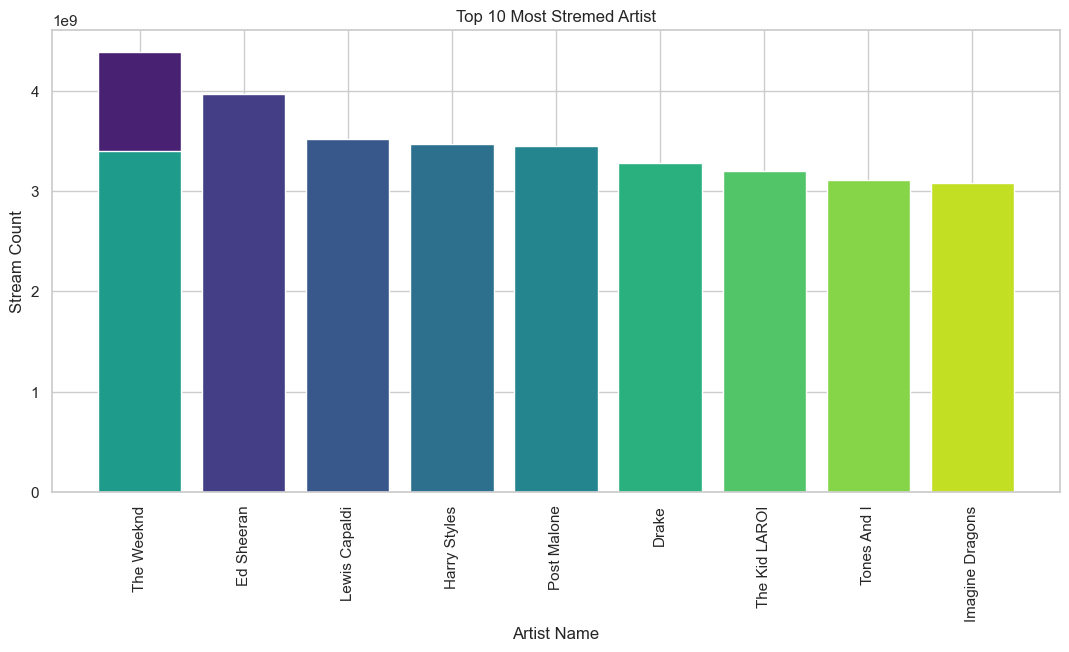

In [476]:
plt.figure(figsize=(13,6))
colors=sns.color_palette('viridis',len(Top10_mostStremed_Artist))
plt.bar(Top10_mostStremed_Artist['Artist'],Top10_mostStremed_Artist['Streams'],color=colors)
plt.title("Top 10 Most Stremed Artist")
plt.xlabel("Artist Name")
plt.ylabel("Stream Count")
plt.xticks(rotation=90)
plt.show()

In [477]:
df.head(3)

,Title,Artist,Streams,Daily,year,main_genre,first_genre,second_genre
0,No Role Modelz,J. Cole,2300753974,987553,2014,Hip-Hop/Rap,conscious hip hop,hip hop
1,Stay With Me,Sam Smith,2135129240,875392,2014,Pop,pop,uk pop
2,Uptown Funk,Mark Ronson,2039781091,675268,2014,Pop,pop soul,Unknown


In [478]:
Top10_mostStremed_ArtistWithTitle=df.groupby(['Title','Artist'])['Streams'].sum().reset_index().sort_values(by='Streams',ascending=False).head(10)

In [479]:
Top10_mostStremed_ArtistWithTitle

,Title,Artist,Streams
1142,Blinding Lights,The Weeknd,4387731728
7408,Shape of You,Ed Sheeran,4160427682
7700,Someone You Loved,Lewis Capaldi,3522436549
2136,Despacito,Luis Fonsi,3508513991
645,As It Was,Harry Styles,3471556211
7969,Sunflower,Post Malone,3453846546
7797,Starboy,The Weeknd,3401512331
2177,Die For You,The Weeknd,3309609255
6142,One Dance,Drake,3280298923
3543,Heat Waves,Glass Animals,3215192571


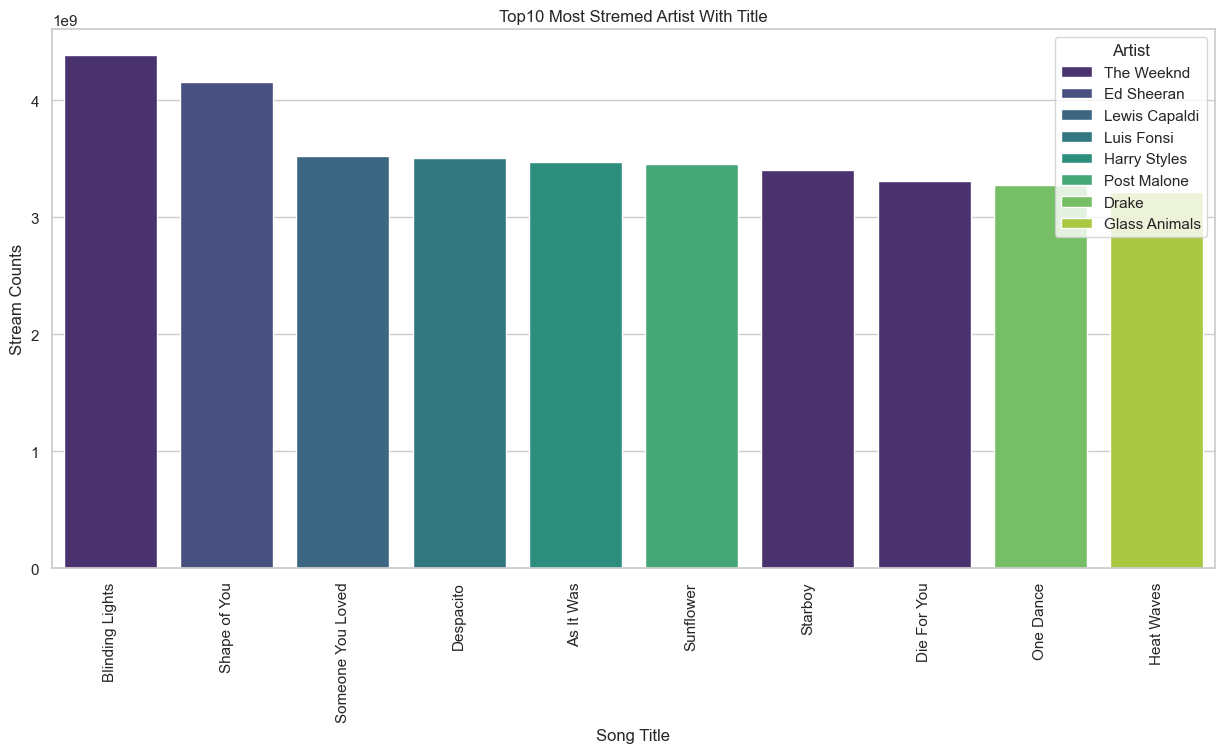

In [480]:
plt.figure(figsize=(15,7))
sns.barplot(data=Top10_mostStremed_ArtistWithTitle,x='Title',y='Streams',hue='Artist',palette='viridis')
plt.title("Top10 Most Stremed Artist With Title")
plt.xlabel("Song Title")
plt.ylabel("Stream Counts")
plt.xticks(rotation=90)
plt.show()

In [481]:
df.head(3)

,Title,Artist,Streams,Daily,year,main_genre,first_genre,second_genre
0,No Role Modelz,J. Cole,2300753974,987553,2014,Hip-Hop/Rap,conscious hip hop,hip hop
1,Stay With Me,Sam Smith,2135129240,875392,2014,Pop,pop,uk pop
2,Uptown Funk,Mark Ronson,2039781091,675268,2014,Pop,pop soul,Unknown


In [482]:
Top10_DailymostStremed_ArtistWithTitle=df.groupby(['Title','Artist'])['Daily'].sum().reset_index().sort_values(by='Daily',ascending=False).head(10)
Top10_DailymostStremed_ArtistWithTitle

,Title,Artist,Daily
4898,Lose Control,Teddy Swims,3009384
6164,One Of The Girls,The Weeknd,2737550
8356,The Night We Met,Lord Huron,2704837
1876,Cruel Summer,Taylor Swift,2641726
3950,I Wanna Be Yours,Arctic Monkeys,2432414
8014,Sweater Weather,The Neighbourhood,2346356
7373,Seven,Jung Kook,2339747
4501,LUNA,Feid,2206515
2177,Die For You,The Weeknd,2108411
7794,Standing Next to You,Jung Kook,2071754


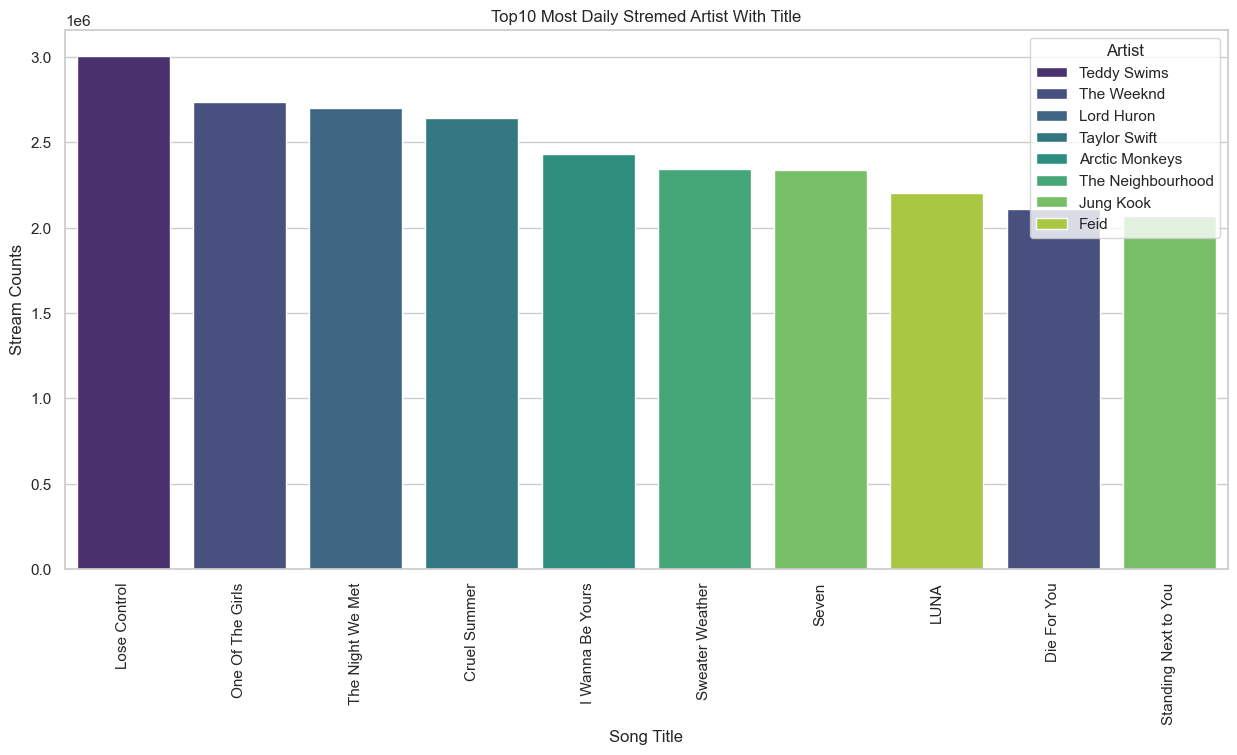

In [483]:
plt.figure(figsize=(15,7))
sns.barplot(data=Top10_DailymostStremed_ArtistWithTitle,x='Title',y='Daily',hue='Artist',palette='viridis')
plt.title("Top10 Most Daily Stremed Artist With Title")
plt.xlabel("Song Title")
plt.ylabel("Stream Counts")
plt.xticks(rotation=90)
plt.show()

In [484]:
ndf=df.copy()
ndf.head(3)

,Title,Artist,Streams,Daily,year,main_genre,first_genre,second_genre
0,No Role Modelz,J. Cole,2300753974,987553,2014,Hip-Hop/Rap,conscious hip hop,hip hop
1,Stay With Me,Sam Smith,2135129240,875392,2014,Pop,pop,uk pop
2,Uptown Funk,Mark Ronson,2039781091,675268,2014,Pop,pop soul,Unknown


In [485]:
ndf['year'] = ndf['year'].astype(int)
ndf.set_index('year', inplace=True)

In [486]:
ndf.head(3)

,Title,Artist,Streams,Daily,main_genre,first_genre,second_genre
year,,,,,,,
2014,No Role Modelz,J. Cole,2300753974,987553,Hip-Hop/Rap,conscious hip hop,hip hop
2014,Stay With Me,Sam Smith,2135129240,875392,Pop,pop,uk pop
2014,Uptown Funk,Mark Ronson,2039781091,675268,Pop,pop soul,Unknown


In [487]:

max_streams_per_year = pd.DataFrame(ndf.groupby('year')['Streams'].max())

most_streamed = ndf.merge(max_streams_per_year, on=['year', 'Streams'])


most_streamed.sort_values(by='Streams',ascending=False,inplace=True)

In [488]:
most_streamed

,Title,Artist,Streams,Daily,main_genre,first_genre,second_genre
year,,,,,,,
2020,Blinding Lights,The Weeknd,4387731728,1640271,R&B/Soul,canadian contemporary r&b,canadian pop
2017,Shape of You,Ed Sheeran,3973446189,1036792,Pop,pop,singer-songwriter pop
2018,Someone You Loved,Lewis Capaldi,3522436549,1564116,Pop,pop,uk pop
2022,As It Was,Harry Styles,3471556211,1715525,Pop,pop,Unknown
2016,Starboy,The Weeknd,3401512331,1695909,R&B/Soul,canadian contemporary r&b,canadian pop
2021,STAY,The Kid LAROI,3202673861,1534512,Hip-Hop/Rap,australian hip hop,Unknown
2019,Dance Monkey,Tones And I,3112873889,731006,Pop,australian pop,Unknown
2012,Sweater Weather,The Neighbourhood,3072764689,2346356,Rock,modern alternative rock,modern rock
2013,Riptide,Vance Joy,2652765174,1476013,Pop,folk-pop,modern rock


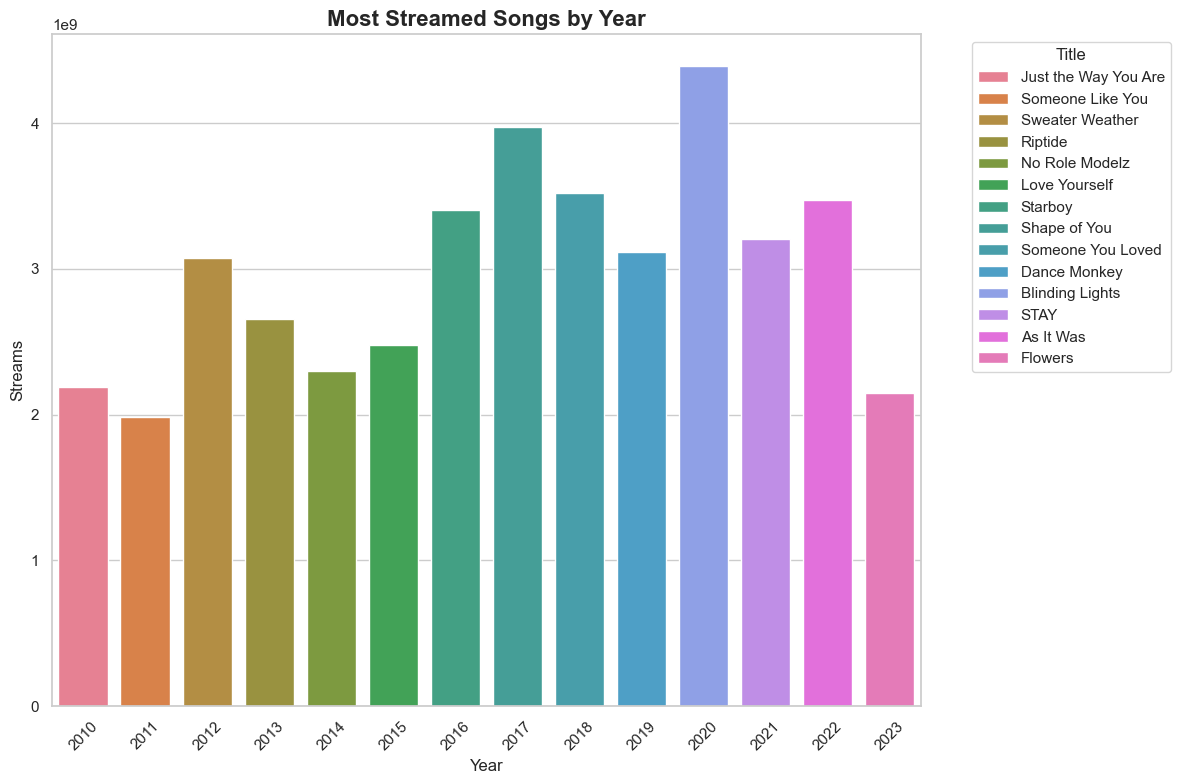

In [530]:

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.barplot(x=most_streamed.index, y='Streams', hue='Title', data=most_streamed, dodge=False)

plt.title("Most Streamed Songs by Year", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Streams", fontsize=12)

plt.xticks(rotation=45)

plt.legend(title='Title', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [491]:

max_Dailystreams_per_year = pd.DataFrame(ndf.groupby('year')['Daily'].max())

most_streamed_daily = ndf.merge(max_Dailystreams_per_year, on=['year', 'Daily'])

most_streamed_daily.sort_values(by='Daily',ascending=False,inplace=True)

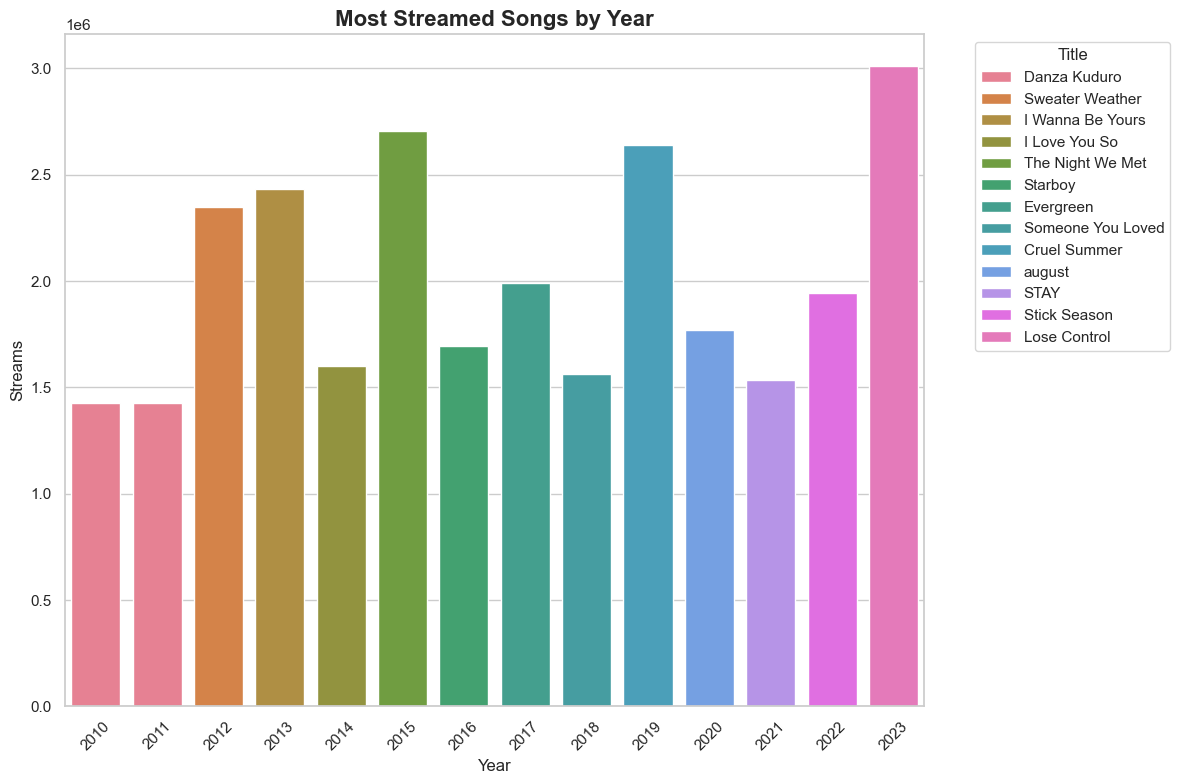

In [529]:

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.barplot(x=most_streamed_daily.index, y='Daily', hue='Title', data=most_streamed_daily, dodge=False)

plt.title("Most Streamed Songs by Year", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Streams", fontsize=12)

plt.xticks(rotation=45)

plt.legend(title='Title', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

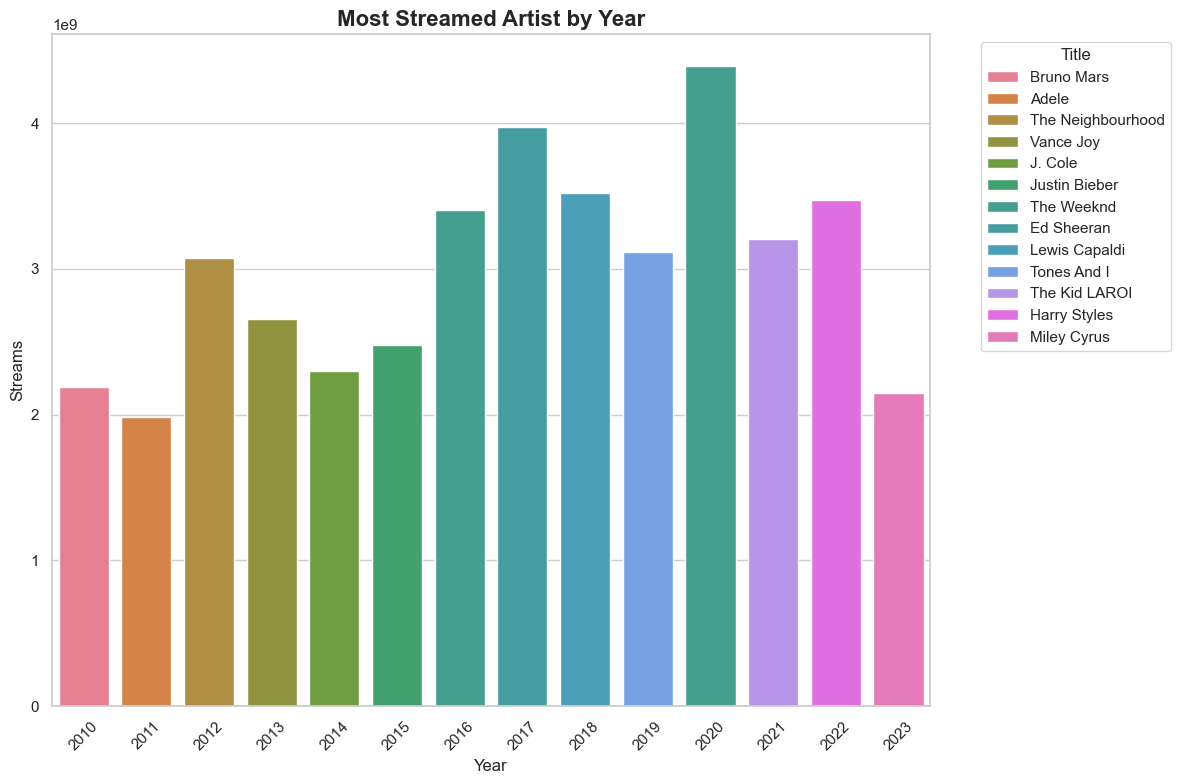

In [528]:

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.barplot(x=most_streamed.index, y='Streams', hue='Artist', data=most_streamed, dodge=False)

plt.title("Most Streamed Artist by Year", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Streams", fontsize=12)

plt.xticks(rotation=45)

plt.legend(title='Title', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [495]:
ndf.head(3)

,Title,Artist,Streams,Daily,main_genre,first_genre,second_genre
year,,,,,,,
2014,No Role Modelz,J. Cole,2300753974,987553,Hip-Hop/Rap,conscious hip hop,hip hop
2014,Stay With Me,Sam Smith,2135129240,875392,Pop,pop,uk pop
2014,Uptown Funk,Mark Ronson,2039781091,675268,Pop,pop soul,Unknown


In [502]:
ndf['main_genre'].unique()

array(['Hip-Hop/Rap', 'Pop', 'Rock', 'R&B/Soul', 'Indie/Alternative',
       'Electronic/Dance', 'World/Traditional', 'Metal',
       'Classical/Orchestral', 'Other'], dtype=object)

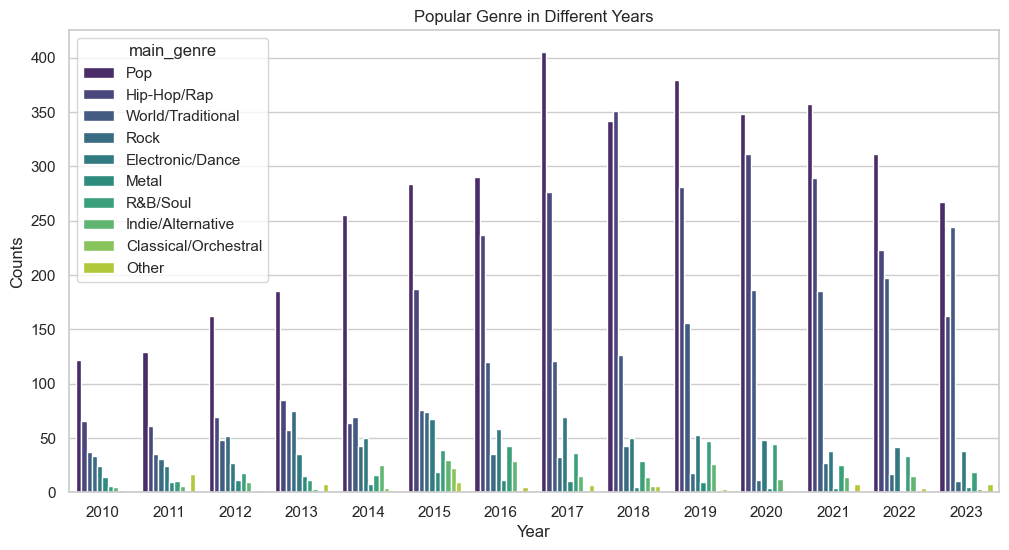

In [524]:
Genre_counts=ndf.groupby(['year', 'main_genre']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
Genre_counts = Genre_counts.sort_values(by='count', ascending=False)
sns.barplot(data=Genre_counts, x='year', y='count', hue='main_genre', palette='viridis')
plt.title("Popular Genre in Different Years")
plt.xlabel("Year")
plt.ylabel("Counts")
plt.show()

In [503]:
ndf.head(3)

,Title,Artist,Streams,Daily,main_genre,first_genre,second_genre
year,,,,,,,
2014,No Role Modelz,J. Cole,2300753974,987553,Hip-Hop/Rap,conscious hip hop,hip hop
2014,Stay With Me,Sam Smith,2135129240,875392,Pop,pop,uk pop
2014,Uptown Funk,Mark Ronson,2039781091,675268,Pop,pop soul,Unknown


In [511]:
most_streamed_genre = ndf.groupby('main_genre')['Streams'].max().reset_index()

most_streamed_genre.columns = ['main_genre', 'max_streams']

In [521]:
most_streamed_genre

,main_genre,max_streams
7,R&B/Soul,4387731728
6,Pop,3973446189
2,Hip-Hop/Rap,3453846546
8,Rock,3083580989
3,Indie/Alternative,3083042178
1,Electronic/Dance,2190292681
9,World/Traditional,2021350367
5,Other,1590200516
0,Classical/Orchestral,823383345
4,Metal,799311305


In [518]:
most_streamed_genre.sort_values(by='max_streams',ascending=False,inplace=True)

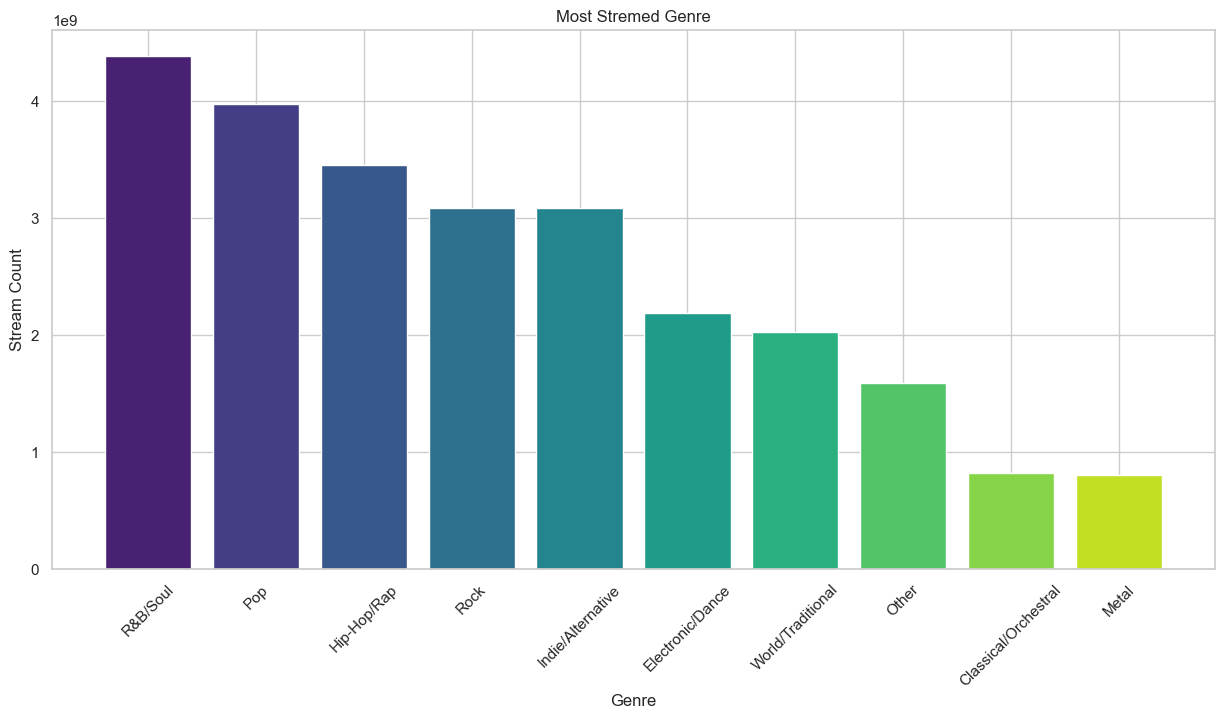

In [520]:
plt.figure(figsize=(15,7))
colors=sns.color_palette('viridis',len(most_streamed_genre))
plt.bar(most_streamed_genre['main_genre'],most_streamed_genre['max_streams'],color=colors)
plt.title("Most Stremed Genre")
plt.xlabel("Genre")
plt.ylabel("Stream Count")
plt.xticks(rotation=45)
plt.show()